# **WALMART Project**

# Importing librairies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

# 1. READING DATASET AND EDA

In [3]:
df = pd.read_csv("Walmart_Store_sales.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


## Basic Analysis

In [6]:
# Basic stats
print("Number of rows : {}".format(len(df)))
print()

print("Basics statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*df.isnull().sum()/len(df))

Number of rows : 150

Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

### Dropping the rows with missing values in Weekly_Sales column

In [7]:
df = df.dropna(subset=["Weekly_Sales"])
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896
...,...,...,...,...,...,...,...,...
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
146,7.0,NaN,716388.81,NaN,20.74,2.778,NaN,NaN
147,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
148,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN


### Extracting information from Date column and creating new ones

In [8]:
date_cols = ['Year','Month','Day','Day of the week']
df_add = pd.DataFrame(columns=date_cols)
df = pd.concat([df,df_add], axis=1)

In [9]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day of the week
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858,NaN,NaN,NaN,NaN
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470,NaN,NaN,NaN,NaN
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092,NaN,NaN,NaN,NaN
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896,NaN,NaN,NaN,NaN


### Converting Temperatures from Fahrenheit to Celsius

In [10]:
df['Temperature'] = ((df['Temperature']-32)/1.8)

### Drop rows where Date isNull

In [11]:
print("Dropping empty Date rows...")
df.dropna(subset = ['Date'], inplace=True)
print("...Done")

# Rows remaining in df 
print("Rows remaining in df : {}".format(df.shape[0]))

Dropping empty Date rows...
...Done
Rows remaining in df : 118


In [12]:
df.shape

(118, 12)

### Converting Date values into Datetime format

In [13]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, format='%d-%m-%Y')

In [14]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Day of the week"] = df["Date"].dt.day_name()

In [15]:
# Removing .0 in dates columns
df['Year'] = [str(y).replace('.0','') for y in df['Year']]
df['Month'] = [str(m).replace('.0','') for m in df['Month']]
df['Day'] = [str(d).replace('.0','') for d in df['Day']]

In [16]:
# Converting types of dates columns
df['Year']=df['Year'].astype('int')
df['Month']=df['Month'].astype('int')
df['Day']=df['Day'].astype('int')

In [17]:
# Moving the future Y column to predict at the end of the dataset for future convenience
df = df.loc[:,['Store', 'Date', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day',
       'Day of the week','Weekly_Sales']]
df

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day of the week,Weekly_Sales
0,6.0,2011-02-18,NaN,15.338889,3.045,214.777523,6.858,2011,2,18,Friday,1572117.54
1,13.0,2011-03-25,0.0,5.766667,3.435,128.616064,7.470,2011,3,25,Friday,1807545.43
4,6.0,2010-05-28,0.0,26.050000,2.759,212.412888,7.092,2010,5,28,Friday,1644470.66
5,4.0,2010-05-28,0.0,NaN,2.756,126.160226,7.896,2010,5,28,Friday,1857533.70
6,15.0,2011-06-03,0.0,21.000000,4.069,134.855161,7.658,2011,6,3,Friday,695396.19
...,...,...,...,...,...,...,...,...,...,...,...,...
144,3.0,2012-10-19,0.0,23.022222,3.594,226.968844,6.034,2012,10,19,Friday,424513.08
145,14.0,2010-06-18,0.0,22.566667,2.780,182.442420,8.899,2010,6,18,Friday,2248645.59
147,17.0,2010-06-11,0.0,13.966667,2.841,126.111903,NaN,2010,6,11,Friday,845252.21
148,8.0,2011-08-12,0.0,30.027778,3.638,219.007525,NaN,2011,8,12,Friday,856796.10


### Dropping outliers

In [18]:
print('***** Outliers in Temperature *****')
upper_border = df['Temperature'].mean() + 3*df['Temperature'].std()
lower_border = df['Temperature'].mean() - 3*df['Temperature'].std()
print()
print('Number of outliers to drop : ', (df.loc[(df['Temperature']<lower_border) | (df['Temperature']>upper_border)].shape[0]))

print()
print('***** Outliers in Unemployment *****')
upper_border = df['Unemployment'].mean() + 3*df['Unemployment'].std()
lower_border = df['Unemployment'].mean() - 3*df['Unemployment'].std()
print()

print('Number of outliers to drop : ', (df.loc[(df['Unemployment']<lower_border) | (df['Unemployment']>upper_border)].shape[0]))
print()
print('***** Outliers in Fuel_Price *****')
upper_border = df['Fuel_Price'].mean() + 3*df['Fuel_Price'].std()
lower_border = df['Fuel_Price'].mean() - 3*df['Fuel_Price'].std()
print()

print('Number of outliers to drop : ', (df.loc[(df['Fuel_Price']<lower_border) | (df['Fuel_Price']>upper_border)].shape[0]))
print()

print('***** Outliers in CPI *****')
upper_border = df['CPI'].mean() + 3*df['CPI'].std()
lower_border = df['CPI'].mean() - 3*df['CPI'].std()
print()

print('Number of outliers to drop : ', (df.loc[(df['CPI']<lower_border) | (df['CPI']>upper_border)].shape[0]))


***** Outliers in Temperature *****

Number of outliers to drop :  0

***** Outliers in Unemployment *****

Number of outliers to drop :  5

***** Outliers in Fuel_Price *****

Number of outliers to drop :  0

***** Outliers in CPI *****

Number of outliers to drop :  0


<br/>

**Unemployment column is the only column that gets outliers to drop**

In [19]:
# Creating upper and lower border
upper_border = df['Unemployment'].mean() + 3*df['Unemployment'].std()
lower_border = df['Unemployment'].mean() - 3*df['Unemployment'].std()

# Dropping outliers of Unemployment
df=df.drop(df.loc[(df['Unemployment'] <= lower_border) | (df['Unemployment'] >= upper_border)].index)

#New shape after removal
df.shape 

(113, 12)

In [20]:
df.head()

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day of the week,Weekly_Sales
0,6.0,2011-02-18,NaN,15.338889,3.045,214.777523,6.858,2011,2,18,Friday,1572117.54
1,13.0,2011-03-25,0.0,5.766667,3.435,128.616064,7.470,2011,3,25,Friday,1807545.43
4,6.0,2010-05-28,0.0,26.050000,2.759,212.412888,7.092,2010,5,28,Friday,1644470.66
5,4.0,2010-05-28,0.0,NaN,2.756,126.160226,7.896,2010,5,28,Friday,1857533.70
6,15.0,2011-06-03,0.0,21.000000,4.069,134.855161,7.658,2011,6,3,Friday,695396.19


In [21]:
df['Day of the week'].unique()

array(['Friday'], dtype=object)

**The column 'Day of the week' only get one variable ('Friday'). It's not useful for the model to get patterns. Let's drop it**

In [22]:
# Removing column Day of the Week
df.drop('Day of the week', axis=1, inplace=True)

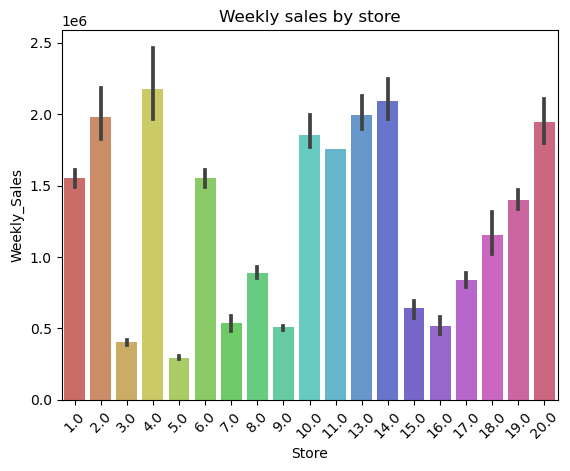

In [23]:
# Plotting sales by store 
sns.barplot(data = df, x='Store', y='Weekly_Sales', palette='hls')
plt.title("Weekly sales by store")
plt.xticks(rotation=45)
plt.show()

⚠️ **Store 12.0 is missing** : indeed when removing outliers, all of them came from store n°12

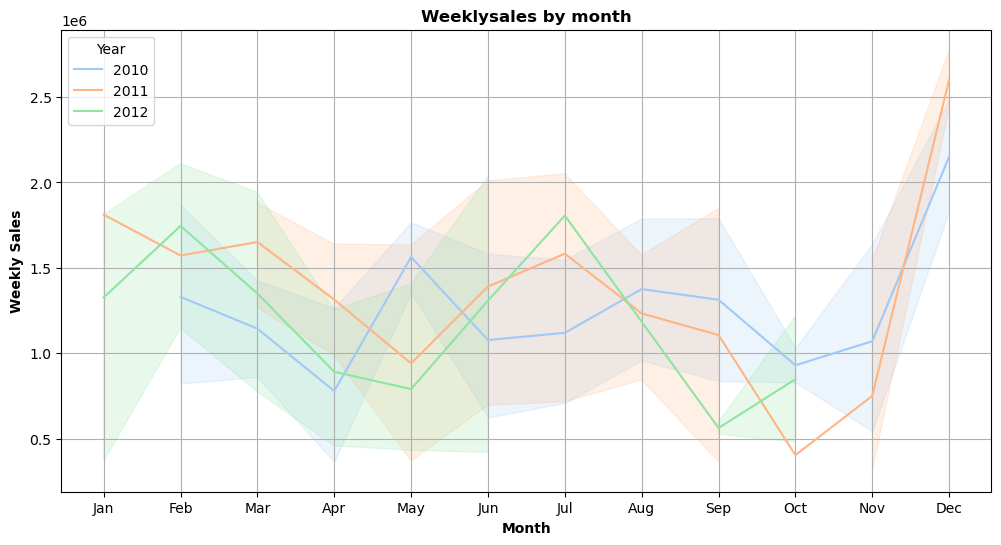

In [24]:
#Plotting weekly sales by store
plt.figure(figsize=(12,6))
fig=sns.lineplot(data=df, x='Month', y='Weekly_Sales', hue='Year', palette ='pastel', errorbar=('ci',95))
plt.title('Weeklysales by month',fontweight='bold')
plt.xlabel('Month',fontweight='bold')
plt.grid()
plt.xticks(np.sort(df['Month'].unique()))
fig.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('Weekly Sales',fontweight='bold')
fig;

➡️ December is a very important month. Christmas must have a huge impact  
➡️ Summer months (June, July and August) seem to be an important period as well  
➡️ On the other hand, spring and fall months are periods with the fewest sales

C:\Users\j.lopes\AppData\Local\anaconda\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


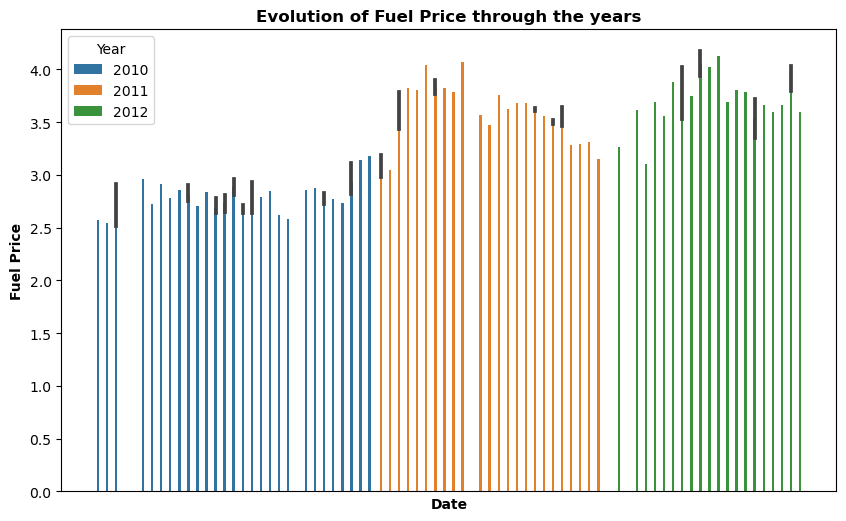

In [25]:
#Plotting the evolution of fuel price through the years
plt.figure(figsize=(10,6))
sns.barplot(data=df,y='Fuel_Price',x=df['Date'].sort_values(ascending=True), hue='Year')
plt.title('Evolution of Fuel Price through the years',fontweight='bold')
plt.locator_params(axis='x', nbins=10)
plt.xlabel('Date',fontweight='bold')
plt.ylabel('Fuel Price', fontweight='bold')
plt.xticks([])
plt.show();

In [26]:
#Mean of fuel price per year
pd.DataFrame(df.groupby('Year')["Fuel_Price"].mean().round(2))

,Fuel_Price
Year,
2010,2.78
2011,3.57
2012,3.71


➡️ Overall, we notice a steady increase of the fuel price through the years with almost 1$ raise within 2 years

C:\Users\j.lopes\AppData\Local\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


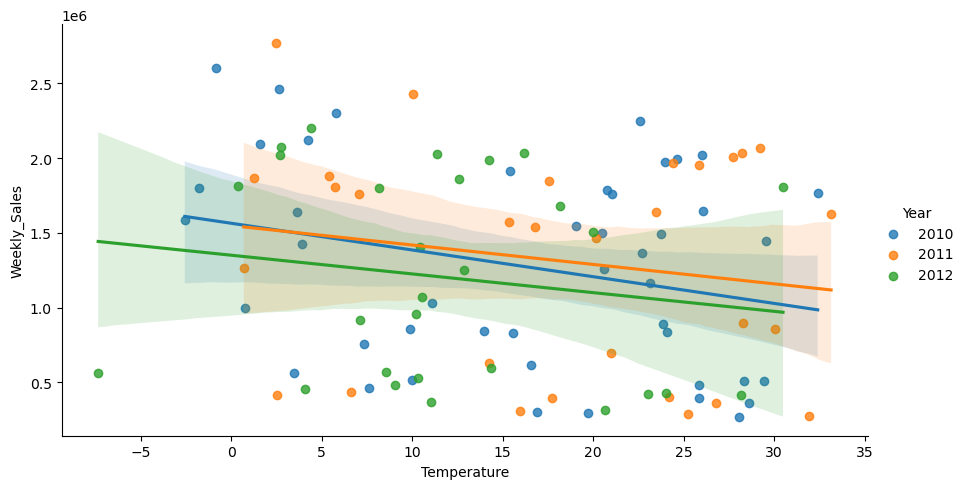

In [27]:
# Plotting Weekly sales by Temperature and through years
sns.lmplot(data=df,y='Weekly_Sales',x='Temperature', hue='Year',aspect=16/9)
plt.show();

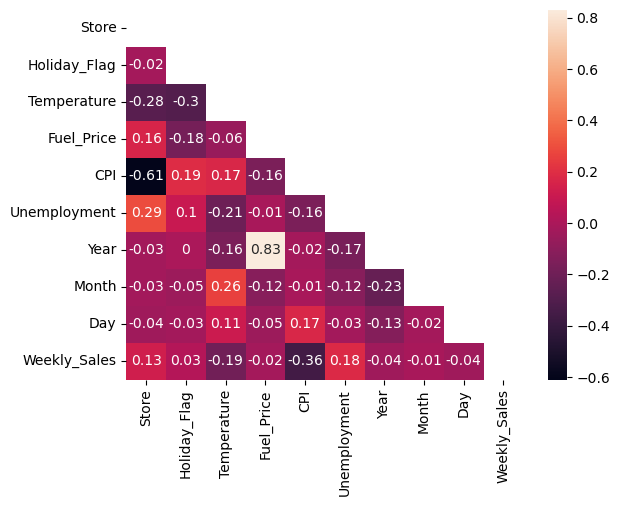

In [28]:
# Correlation matrix
mask = np.triu(np.ones_like(df.corr(numeric_only=True), dtype=bool)) #Upper mask
sns.heatmap(round(df.corr(numeric_only=True),2), mask=mask,annot=True);

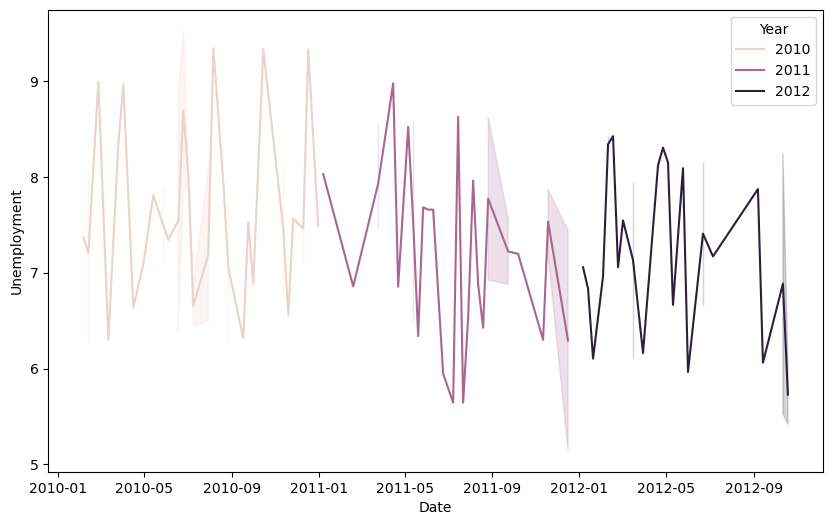

In [29]:
# Plotting Unemployment through the years
plt.figure(figsize=(10,6))
sns.lineplot(data=df,x='Date',y='Unemployment',hue='Year')
plt.show()

# 2.MODELING

- ## 2.1 Preprocessing

In [31]:
#Dropping the Date column
df.drop('Date',axis=1, inplace=True)

In [32]:
print("Splitting dataset into X and y...")
X = df.iloc[:,:-1] # We select all columns except our TARGET variable

Y = df.iloc[:,-1] # We only select our target variable
print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Splitting dataset into X and y...
...Done.

Y : 
0    1572117.54
1    1807545.43
4    1644470.66
5    1857533.70
6     695396.19
Name: Weekly_Sales, dtype: float64

X :
   Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0    6.0           NaN    15.338889       3.045  214.777523         6.858   
1   13.0           0.0     5.766667       3.435  128.616064         7.470   
4    6.0           0.0    26.050000       2.759  212.412888         7.092   
5    4.0           0.0          NaN       2.756  126.160226         7.896   
6   15.0           0.0    21.000000       4.069  134.855161         7.658   

   Year  Month  Day  
0  2011      2   18  
1  2011      3   25  
4  2010      5   28  
5  2010      5   28  
6  2011      6    3  


In [33]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [35]:
# Create pipeline for numeric features
numeric_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment','Year','Month','Day'] # Names of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # missing values will be replaced by columns' median
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_features = ['Store', 'Holiday_Flag'] # Names of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

In [36]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
        
    ])

In [37]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5]) # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head()) 
X_test = preprocessor.transform(X_test) # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.
print('...Done.')
print(X_test[0:5,:]) # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
print()

Performing preprocessings on train set...
     Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
52     9.0           0.0    29.455556       2.653  214.896576           NaN   
11    18.0           0.0    11.122222       2.878  132.763355         9.331   
105   19.0           0.0    22.683333       2.932  132.598387         8.099   
110   20.0           1.0    -1.750000       3.179  204.643227         7.484   
75    20.0           0.0    23.983333       2.808  204.567546         7.856   

     Year  Month  Day  
52   2010      6   25  
11   2010     10   15  
105  2010      7   30  
110  2010     12   31  
75   2010      6   25  
...Done.
[[ 0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          1.52509498 -1.37012974  0.95928786  0.12672055 -1.05558715
  -0.02760328  1.01737744]
 [ 0.          0.          0.  

- ## 2.2 Train model

In [38]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


- ## 2.3 Performance assessment

In [39]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[ 345453.41734299 1166916.83331935 1402517.44634193 2068151.71407692
 1921354.8585015  1993918.80422721 2164731.92953557 1584915.66688982
  609412.40590646 2419162.41306689 1424763.67477377 2056420.57731472
 1960039.73001308 1986470.70699678 1291857.73040625 1910049.32195797
  583064.27306588 1357151.51196631 1372723.2151276   926990.59281169
 2113760.76135912  351094.2714745  1977360.6047895   377290.46649403
 1653171.71530068 1847766.51384435 2042843.32280853 2065845.52748385
 2071865.16759688  686626.20122392  606972.63525748 1157565.57400604
  377438.3204395   402208.16409353 1539896.46958316 1986890.28742158
 2436208.44389106  444619.04716171 1629855.48261014 1559336.41376164
  507937.44111981  336085.10478546  422313.71639306 1489552.80857663
  760464.79397008  417648.20784499 1993259.25197737 2173040.85508446
 1757242.51        481013.78891684  945026.02256024 1477646.92356706
 2110671.84374898  131934.39574529 1400955.90200803  949240.143

In [40]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = regressor.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[ 377852.43059059 1442910.9981167  1614894.14654116  884781.79007114
  493344.53432481 1183135.87235512 1999199.45322043 2326016.61653379
 2026250.78874589 1555619.08013384 1033370.55202618 2043416.07066753
 1122943.29696071  604308.86918627  465363.43339226   61004.14256379
  610158.40748028  163968.32492321 1883613.56738896  486007.38808265
 1929187.52099832  472351.38741341 2064918.10984959]



In [41]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9719610499160057
R2 score on test set :  0.9492716025800253


📝 **Model's quality**  
- ➡️ The predictions are very good.  
- ➡️ What about the features importances ? Which one are the most important in this model ? Let's check the **.coef_**

In [42]:
print("The coefficients are : ",regressor.coef_)
print()
print("The constant is :",regressor.intercept_)

The coefficients are :  [ 3.68853893e+05 -1.19444058e+06  4.24171231e+05 -1.36879517e+06
  3.31263311e+04 -9.68656181e+05 -7.15381913e+05 -1.17446761e+06
  4.12235068e+05  1.59272701e+05  3.07473701e+05  6.01715554e+05
 -8.90606529e+05 -1.12069333e+06 -9.51677269e+05 -4.68229729e+05
 -1.41739421e+05  4.11217943e+05 -5.80021141e+04 -3.46258558e+04
 -4.20285964e+04 -3.11450415e+04 -7.10984772e+04  4.52590826e+02
  7.65244148e+04 -3.82685498e+04]

The constant is : 1595554.445333251


In [43]:
column_names = []
for name, pipeline, features_list in preprocessor.transformers_: # loop over pipelines
    if name == 'num': # if pipeline is for numeric variables
        features = features_list # just get the names of columns to which it has been applied
    else: # if pipeline is for categorical variables
        features = pipeline.named_steps['encoder'].get_feature_names_out() # get output columns names from OneHotEncoder
    column_names.extend(features) # concatenate features names
        
print("Names of columns corresponding to each coefficient: ", column_names)

Names of columns corresponding to each coefficient:  ['x0_2.0', 'x0_3.0', 'x0_4.0', 'x0_5.0', 'x0_6.0', 'x0_7.0', 'x0_8.0', 'x0_9.0', 'x0_10.0', 'x0_11.0', 'x0_13.0', 'x0_14.0', 'x0_15.0', 'x0_16.0', 'x0_17.0', 'x0_18.0', 'x0_19.0', 'x0_20.0', 'x1_1.0', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day']


- ## 2.4 Features Importance

In [44]:
# Create a pandas DataFrame
coefs = pd.DataFrame(index = column_names, data = regressor.coef_.transpose(), columns=["coefficients"])
coefs

,coefficients
x0_2.0,3.688539e+05
x0_3.0,-1.194441e+06
x0_4.0,4.241712e+05
x0_5.0,-1.368795e+06
x0_6.0,3.312633e+04
x0_7.0,-9.686562e+05
x0_8.0,-7.153819e+05
x0_9.0,-1.174468e+06
x0_10.0,4.122351e+05
x0_11.0,1.592727e+05


In [45]:
# Compute abs() and sort values by most importance features
feature_importance = abs(coefs).sort_values(by = 'coefficients', ascending=False)
feature_importance

,coefficients
x0_5.0,1.368795e+06
x0_3.0,1.194441e+06
x0_9.0,1.174468e+06
x0_16.0,1.120693e+06
x0_7.0,9.686562e+05
x0_17.0,9.516773e+05
x0_15.0,8.906065e+05
x0_8.0,7.153819e+05
x0_14.0,6.017156e+05
x0_18.0,4.682297e+05


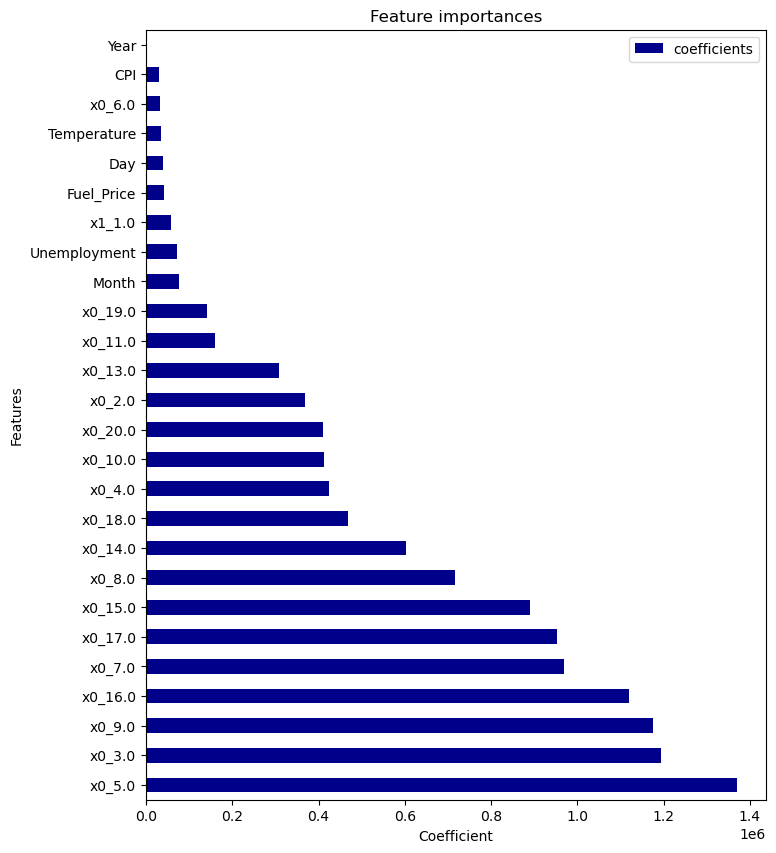

In [46]:
# Plotting Feature importances
feature_importance.plot(kind='barh', figsize=(8, 10), color='darkblue')
plt.title('Feature importances')
plt.ylabel('Features')
plt.xlabel('Coefficient')
plt.show()

➡️ Stores are the most important features far away from Month and Unemployment

# 3. GRIDSEARCH

**Let's try to improve our model by performing a grid search for Ridge and Lasso hyperparameters**

In [47]:
# Perform grid search
print("Grid search...")
regressor = Ridge()
# Grid of values to be tested
params = {
    'alpha': [0.01, 0.02, 0.05, 0.1, 0.5, 1, 10] # 0 corresponds to no regularization
}
gridsearch = GridSearchCV(regressor, param_grid = params, cv = 10) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

print()
# Print R^2 scores
print("R2 score on training set : ", gridsearch.score(X_train, Y_train))
print("R2 score on test set : ", gridsearch.score(X_test, Y_test))

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.05}
Best R2 score :  0.9167461886219936

R2 score on training set :  0.971432360946731
R2 score on test set :  0.9569797242772162


In [48]:
# Perform grid search
print("Grid search...")
# Grid of values to be tested
params = {
    'alpha': [0.1, 1, 10,100,500,1000] # 0 corresponds to no regularization
}
gridsearch = GridSearchCV(regressor, param_grid = params, cv = 10) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

print()
# Print R^2 scores
print("R2 score on training set : ", gridsearch.score(X_train, Y_train))
print("R2 score on test set : ", gridsearch.score(X_test, Y_test))

Grid search...
...Done.
Best hyperparameters :  {'alpha': 1000}
Best R2 score :  0.9208313805285189

R2 score on training set :  0.9703771386862027
R2 score on test set :  0.9592893720220962


### 📝 Results are quite the same for Ridge and Lasso.  
- Lasso gets slightly better results.  
- Let's use Lasso to improve our model

In [49]:
lasso = Lasso(alpha=1000)
lasso.fit(X_train, Y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("r2-score on train set : ", r2_score(Y_train, y_train_pred))
print("r2-score on test set : ", r2_score(Y_test, y_test_pred))

r2-score on train set :  0.9703771386862027
r2-score on test set :  0.9592893720220962
